In [4]:
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
  print("Running in Colab.\nCloning Repo...\n")
  %cd /content
  !git clone https://github.com/ColourlessSpearmint/Mantis.git
  %cd Mantis


In [5]:
import os
import sys
import matplotlib.pyplot as plt
import random

if IN_COLAB:
  sys.path.append(os.path.abspath(os.path.join('..', 'Mantis')))
else:
  sys.path.append(os.path.abspath('..'))
from src import MantisGame, MatcherBot, ScorerBot, ThiefBot, RandomBot, CertaintyBot


def plot_common_items(data):
  """
  Plots the frequency of items in the given list.

  Args:
    data: A list of items.

  Returns:
    None
  """

  # Count the occurrences of each item
  item_counts = {}
  for item in data:
    if item in item_counts:
      item_counts[item] += 1
    else:
      item_counts[item] = 1

  # Sort the items by frequency in descending order
  sorted_items = sorted(item_counts.items(), key=lambda x: x[1], reverse=True)

  # Extract the items and their frequencies
  items, frequencies = zip(*sorted_items)

  # Create the bar plot
  plt.bar(items, frequencies)
  plt.xlabel('Items')
  plt.ylabel('Frequency')
  plt.title('Frequency of Items')
  plt.show()

def run_duel(player_pool=[], random_players=False, games=1):
  winners = []
  turns_list = []

  for i in range(games):
    if random_players:
      players = [random.choice(player_pool) for _ in range(4)]
    else:
      assert len(player_pool) == 4
      players = player_pool
    winner, turns, state = bot_duel(players, verbose=False)
    winners.append(players[winner].name)
    turns_list.append(turns)
  return winners


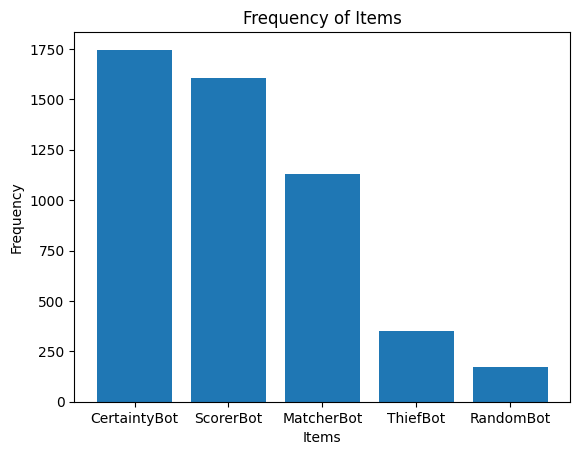

In [7]:
games = 5000 # @param {"type":"integer"}
player_pool = [MatcherBot(), ScorerBot(), ThiefBot(), RandomBot(), CertaintyBot()]
plot_common_items(run_duel(player_pool, True, games))